In [4]:
# %matplotli%notebookebook
%matplotlib inline
from common import *

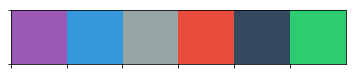

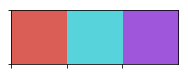

In [19]:
orig_methods = '1D Binary Search', 'Multi 2D Binary Search Tree', 'Category Tree' # 'K-D Tree', 

method_labels = 'Simultaneous $1$-d Binary Searches', 'Simultaneous Lueker\'s $2$-d Trees', 'Combination' #'Bentley\'s $k$-d Tree', 
multi_line_method_labels = 'Sim. $1$-d\nBin. Searches', 'Sim. Lueker\'s\n$2$-d Trees', 'Combination' #  'Bentley\'s\n$k$-d Tree',

all_ds = data.all_datasets
datasets_names = "Concave", "Increasing", "Mostly\nIncreasing"

def find_paper_ds_names(input_names, array_to_reorder):
    l_ind = [results.analyze.get_close_matches_indexes(l, input_names, cutoff=0.5)[0] for l in orig_methods]
    h = [array_to_reorder[l] for l in l_ind]
    return l_ind, handles

def convert_resources_labels(lbls):
    return ["R=%s" % l for l in lbls]

n_resources = 6
# resources_color_palette = sns.color_palette('hls', n_colors)
resources_color_palette = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])
sns.palplot(resources_color_palette)
resources_markers = ["v", 'P', 's', 'd', 'o', '^']

n_methods = 3
# methods_colors_palette = sns.color_palette('hls', n_methods)
methods_colors_palette = sns.color_palette([(0.86, 0.3712, 0.33999999999999997),
#                                  '#07134f',
                                 (0.33999999999999997, 0.8287999999999999, 0.86),
                                 (0.6311999999999998, 0.33999999999999997, 0.86)])
sns.palplot(methods_colors_palette)
init_plot(font_size=16, paper=True)

# Joint Val vs. Maille Tuffin

In [48]:
r = results.read_unified_results(ds_obj_concave, 'concave')

concave/(.+) - matching: 10 - valid: 10 - total: 100


In [23]:
r = results.read_unified_results(ds_obj, 'gridpoints')
s = set()
for rr in r['input', 'shape']:
    s.update(np.prod(rr, axis=-1))
print(sorted(s))

gridpoints/(.+) - matching: 15 - valid: 15 - total: 146
[1024, 30037, 30102, 59049, 59050, 88064, 88208, 116964, 117077, 146090, 175104, 204117, 233130, 262144]


concave/8-(.+) - matching: 8 - valid: 8 - total: 80


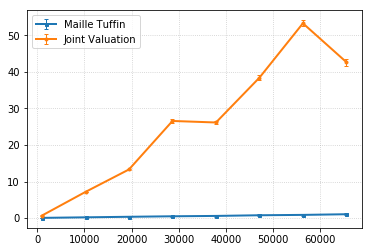

In [119]:
results.plot.joint_val_vs_maille_tuffin(ds_obj, 'concave', '8')

concave/3-(.+) - matching: 5 - valid: 5 - total: 50


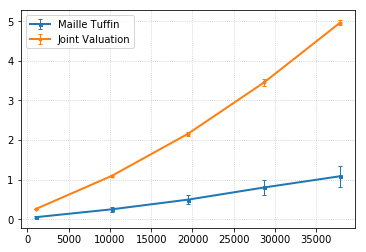

In [128]:
results.plot.joint_val_vs_maille_tuffin(ds_obj, 'concave', '3')

concave/8-(.+) - matching: 8 - valid: 8 - total: 80


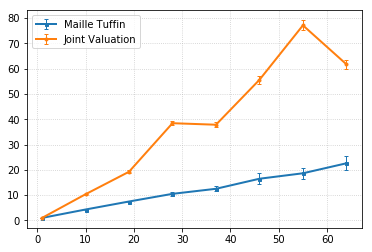

In [120]:
results.plot.joint_val_vs_maille_tuffin(ds_obj, 'concave', '8', normalized=True)

In [125]:
results.analyze.verify_joint_val_vs_maille_tuffin(ds_obj, 'concave', '6')

concave/6-(.+) - matching: 5 - valid: 5 - total: 50
Methods: {'K-D Tree'}
Methods index: {6}
Matching allocations: True
Matching SW: True
Matching payments: True


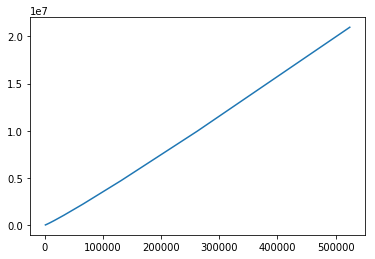

In [131]:
xy = [(1024,22558),(2048,49185),(4096,106532),(8192,229415),(16384,491562),(32768,1048621),(65536,2228272),(131072,4718643),(262144,9961526),(524288,20971577),]
xy = np.array(xy, dtype=float)
x = xy[:,0]
y = xy[:,1]
plt.plot(x,y)

In [45]:
s = np.arange(11)
o = np.array([s[-1], *s[:-2:2], *s[1:-2:2][::-1], s[-2]], dtype=np.uint32)
orig_order = np.argsort(o)
o, orig_order

(array([10,  0,  2,  4,  6,  8,  7,  5,  3,  1,  9], dtype=uint32),
 array([ 1,  9,  2,  8,  3,  7,  4,  6,  5, 10,  0]))

In [46]:
o[orig_order]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint32)

In [51]:
np.sort([1,6,3])

array([1, 3, 6])

In [7]:
sd = ds_obj_concave.load_data(0)
sz = 2**17
max_aloc = sz-1
val_funcs = data.produce.get_vals(sd, sz, ndim=1)
s = np.argsort([np.max(v) for v in val_funcs])
order = [s[-1], *s[:-2:2], *s[1:-2:2][::-1], s[-2]]
val_funcs = [val_funcs[i] for i in order]
from vecfunc.vcg.jointfunclib import join_all
j = join_all(val_funcs, max_aloc, method=3, chunk_size=8, join_stats=False)

In [8]:
j[-1].sum_stats()

{'combinationCount': 0,
 'comparedPoints': 0.0,
 'dsBuildTime': 0.0,
 'dsQueryFetchTime': 0.0,
 'dsQueryTime': 0.0,
 'expectedCombinationCount': 0,
 'expectedComparedPoints': 0.0,
 'joinedFuncCount': 0,
 'method': '2D Range Tree',
 'totalRuntime': 3.999491105}

In [15]:
sd = ds_obj_concave.load_data(0)
sz = 2**17
max_alloc = sz-1
val_funcs = data.produce.get_vals(sd, sz, ndim=1)

ret = vecfunc.vcg.joint_func(val_funcs, max_alloc, join_method=3, join_chunk_size=128, change_join_order=True, join_stats=True)

In [16]:
ret['stats']

{'combinationCount': 66887937,
 'comparedPoints': 510.31446075439453,
 'dsBuildTime': 3.6128243879999995,
 'dsQueryFetchTime': 15.704883748987818,
 'dsQueryTime': 17.501851375996452,
 'expectedCombinationCount': 179511454,
 'expectedComparedPoints': 1369.563705444336,
 'joinedFuncCount': 510,
 'method': '2D Range Tree',
 'optimizationRunTime': 67.51115989685059,
 'totalRuntime': 67.32609194300002}

# Gridpoints

vcg-increasing-6d-256p : ('killer', slice(None, None, None), 'multiply') - matching: 60 - valid: 60 - total: 600
Methods: {'Category Tree'}


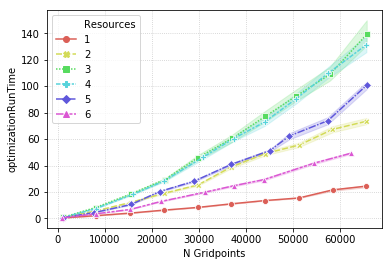

In [12]:
exp_name = 'killer'
ds_obj = data.increasing
df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_suffix='multiply',
                                       val=('stats', 'optimizationRunTime'))

vcg-increasing-6d-256p : ('killer', slice(None, None, None), 'complementary') - matching: 60 - valid: 60 - total: 600
Methods: {'Category Tree'}


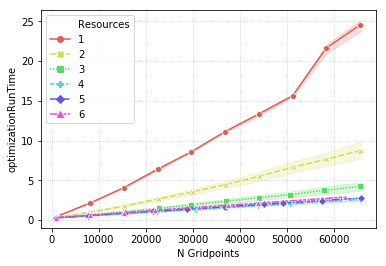

In [13]:
exp_name = 'killer'
ds_obj = data.increasing
df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_suffix='complementary',
                                       val=('stats', 'optimizationRunTime'))

vcg-increasing-6d-256p : ('killer', slice(None, None, None), 'substitute') - matching: 60 - valid: 60 - total: 600
Methods: {'Category Tree'}


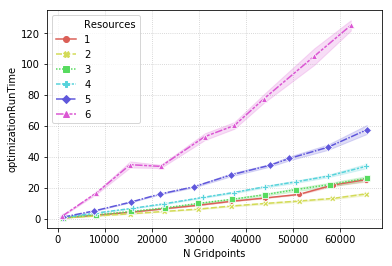

In [14]:
exp_name = 'killer'
ds_obj = data.increasing
df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_suffix='substitute',
                                       val=('stats', 'optimizationRunTime'))

vcg-increasing-6d-256p : ('killer', slice(None, None, None), slice(None, None, None)) - matching: 180 - valid: 180 - total: 1800
Methods: {'Category Tree'}


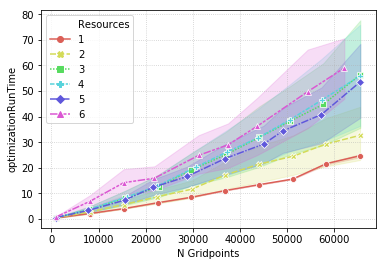

In [11]:
exp_name = 'killer'
ds_obj = data.increasing
df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_suffix=slice(None),
                                       val=('stats', 'optimizationRunTime'))

vcg-concave-6d-256p : ('killer', slice(None, None, None), slice(None, None, None)) - matching: 180 - valid: 180 - total: 1800
Methods: {'Category Tree'}


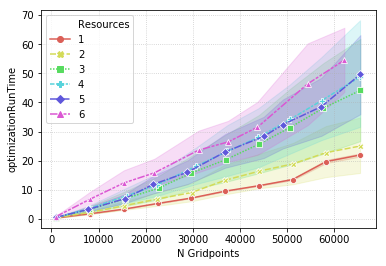

In [8]:
exp_name = 'killer'
ds_obj = data.concave
df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_suffix=slice(None),
                                       val=('stats', 'optimizationRunTime'))

## Older Experiments

gridpoints/filter-buildtime-8-(.+) - matching: 48 - valid: 48 - total: 48
Methods: {'Multi 2D Binary Search Tree (Single)'}
Resource 1 fit: 0.00248227 * n^(0.78)
Resource 2 fit: 3.58773e-05 * n^(1.26)
Resource 3 fit: 4.89035e-06 * n^(1.61)
Resource 4 fit: 7.79063e-07 * n^(1.87)
Resource 5 fit: 5.1887e-07 * n^(1.93)
Resource 6 fit: 9.1277e-07 * n^(1.86)


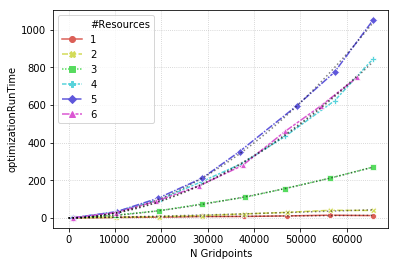

gridpoints/filter-buildtime-8-(.+) - matching: 48 - valid: 48 - total: 48
Methods: {'Multi 2D Binary Search Tree (Single)'}


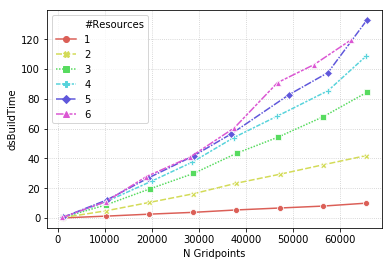

gridpoints/filter-buildtime-8-(.+) - matching: 48 - valid: 48 - total: 48
Methods: {'Multi 2D Binary Search Tree (Single)'}
Resource 1 fit: 175.123 * n^(0.00)
Resource 2 fit: 6.44533 * n^(0.37)
Resource 3 fit: 4.91463 * n^(0.53)
Resource 4 fit: 0.913447 * n^(0.77)
Resource 5 fit: 7.84161 * n^(0.64)
Resource 6 fit: 2.9342 * n^(0.80)


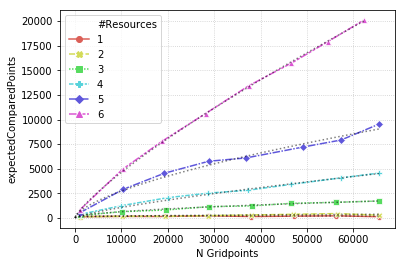

gridpoints/filter-buildtime-8-(.+) - matching: 48 - valid: 48 - total: 48
Methods: {'Multi 2D Binary Search Tree (Single)'}
Resource 1 fit: 734.828 * n^(0.00)
Resource 2 fit: 2160.03 * n^(0.07)
Resource 3 fit: 5428.51 * n^(0.28)
Resource 4 fit: 317.665 * n^(0.68)
Resource 5 fit: 340.381 * n^(0.73)
Resource 6 fit: 150.476 * n^(0.81)


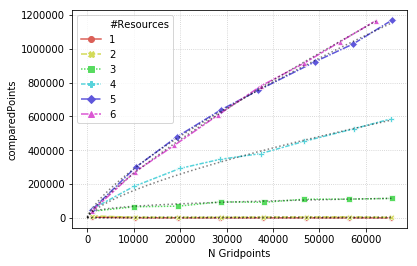

gridpoints/filter-buildtime-8-(.+) - matching: 48 - valid: 48 - total: 48
Methods: {'Multi 2D Binary Search Tree (Single)'}


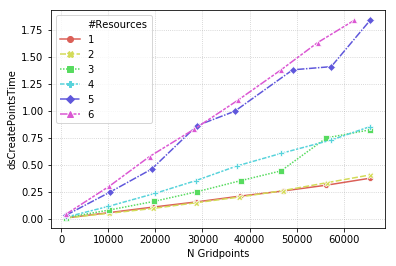

In [218]:
exp_name = 'filter-buildtime-8'
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name,
                                       val=('stats', 'optimizationRunTime'),
                                       sub_val=('stats', 'dsBuildTime'),
                                       fit_method='complexity_pow')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name,
                                       val=('stats', 'dsBuildTime'),
                                       sub_val=('stats', 'dsCreatePointsTime'))
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name,
                                       val=('stats', 'expectedComparedPoints'),
                                       div_val=('stats', 'joinedFuncCount'),
                                       fit_method='complexity_func_pow')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name,
                                       val=('stats', 'comparedPoints'),
                                       fit_method='complexity_func_pow')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name,
                                       val=('stats', 'dsCreatePointsTime'))
plt.show()

scalability/8-(.+) - matching: 36 - valid: 36 - total: 36
Methods: {'Multi 2D Binary Search Tree (Single)'}
Resource 1 fit: 0.000150732 * n^(1.04)
Resource 2 fit: 2.27053e-06 * n^(1.55)


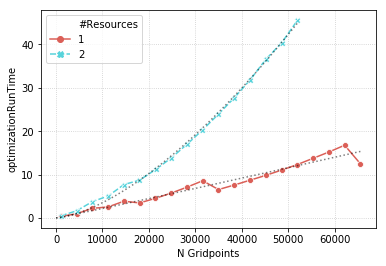

scalability/8-(.+) - matching: 36 - valid: 36 - total: 36
Methods: {'Multi 2D Binary Search Tree (Single)'}
Resource 1 fit: 4.83143e-06 * n * log^(1.25)(n)
Resource 2 fit: 4.60477e-06 * n * log^(1.79)(n)


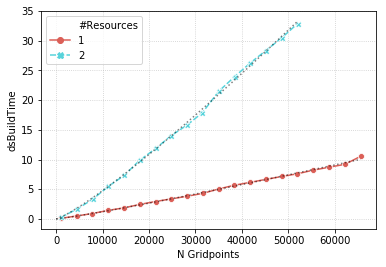

scalability/8-(.+) - matching: 36 - valid: 36 - total: 36
Methods: {'Multi 2D Binary Search Tree (Single)'}


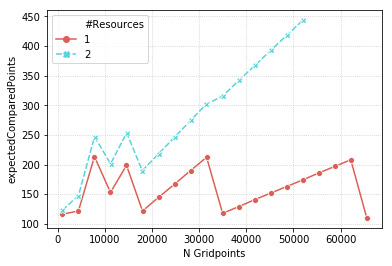

scalability/8-(.+) - matching: 36 - valid: 36 - total: 36
Methods: {'Multi 2D Binary Search Tree (Single)'}


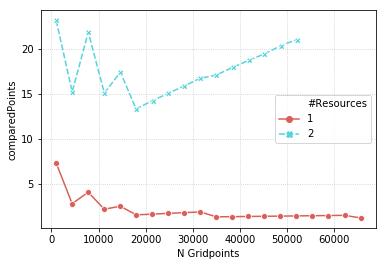

scalability/8-(.+) - matching: 36 - valid: 36 - total: 36
Methods: {'Multi 2D Binary Search Tree (Single)'}


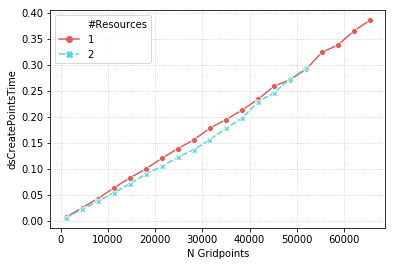

In [34]:
exp_name = 'scalability'
exp_prefix = '8'
ds_obj = data.nonrising
df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'optimizationRunTime'),
                                       sub_val=('stats', 'dsBuildTime'),
                                       fit_method='complexity_pow')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'dsBuildTime'),
                                       sub_val=('stats', 'dsCreatePointsTime'),
                                      fit_method='complexity_nlogn')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'expectedComparedPoints'),
                                       div_val=('stats', 'joinedFuncCount'))
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'comparedPoints'),
                                       div_val=('stats', 'joinedFuncCount'))
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'dsCreatePointsTime'))
plt.show()

scalability/reversed-8-(.+) - matching: 19 - valid: 19 - total: 19
Methods: {'Multi 2D Binary Search Tree (Single)'}
Resource 2 fit: 4.55327e-06 * n^(1.48)
Resource 3 fit: 1.74038e-06 * n^(1.73)


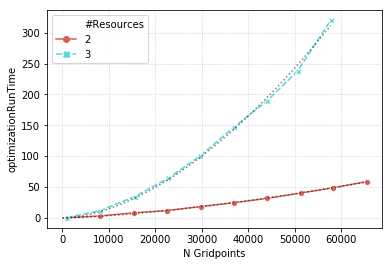

scalability/reversed-8-(.+) - matching: 19 - valid: 19 - total: 19
Methods: {'Multi 2D Binary Search Tree (Single)'}
Resource 2 fit: 5.06853e-06 * n * log^(1.77)(n)
Resource 3 fit: 5.94007e-06 * n * log^(1.91)(n)


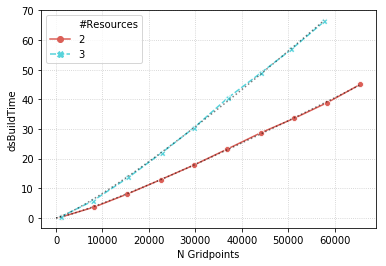

scalability/reversed-8-(.+) - matching: 19 - valid: 19 - total: 19
Methods: {'Multi 2D Binary Search Tree (Single)'}


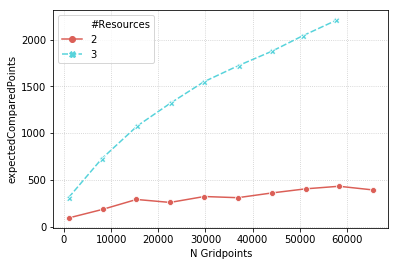

scalability/reversed-8-(.+) - matching: 19 - valid: 19 - total: 19
Methods: {'Multi 2D Binary Search Tree (Single)'}


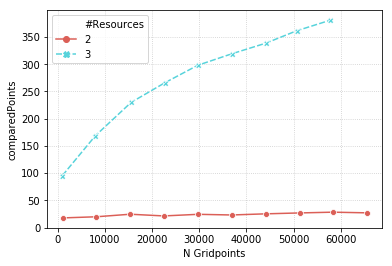

scalability/reversed-8-(.+) - matching: 19 - valid: 19 - total: 19
Methods: {'Multi 2D Binary Search Tree (Single)'}


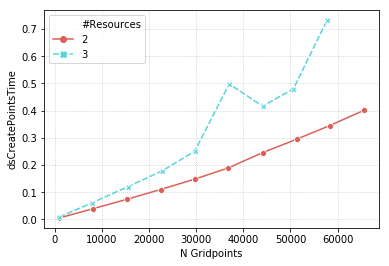

In [40]:
exp_name = 'scalability'
exp_prefix = 'reversed-8'
ds_obj = data.nonrising
df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'optimizationRunTime'),
                                       sub_val=('stats', 'dsBuildTime'),
                                       fit_method='complexity_pow')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'dsBuildTime'),
                                       sub_val=('stats', 'dsCreatePointsTime'),
                                      fit_method='complexity_nlogn')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'expectedComparedPoints'),
                                       div_val=('stats', 'joinedFuncCount'))
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'comparedPoints'),
                                       div_val=('stats', 'joinedFuncCount'))
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'dsCreatePointsTime'))
plt.show()

gridpoints/filter-buildtime-8-(.+) - matching: 48 - valid: 48 - total: 480
Methods: {'Multi 2D Binary Search Tree (Single)'}
Resource 1 fit: 6.4236e-06 * n^(1.31)
Resource 2 fit: 2.5828e-07 * n^(1.75)
Resource 3 fit: 2.04301e-08 * n^(2.05)
Could not fit resource 4 - Optimal parameters not found: The maximum number of function evaluations is exceeded.
Could not fit resource 5 - Optimal parameters not found: The maximum number of function evaluations is exceeded.
Resource 6 fit: 2.64689e-09 * n^(2.31)


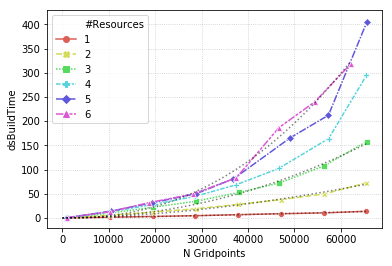

In [86]:
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name,
                                       val=('stats', 'dsBuildTime'),
#                                        sub_val=('stats', 'dsCreatePointsTime'),
                                       fit_method='complexity_func_pow')
plt.show()

gridpoints/filter-buildtime-8-(.+) - matching: 48 - valid: 48 - total: 480
Methods: {'Multi 2D Binary Search Tree (Single)'}
Resource 1 fit: 66107.1 * n^(0.58)
Resource 2 fit: 40719.4 * n^(0.80)
Resource 3 fit: 5164.33 * n^(1.28)
Resource 4 fit: 290.942 * n^(1.69)
Resource 5 fit: 265.119 * n^(1.76)
Resource 6 fit: 151.048 * n^(1.81)


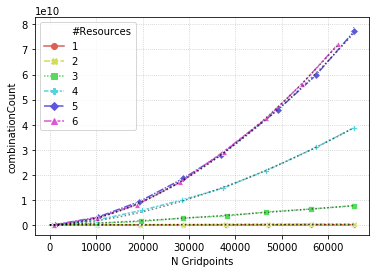

In [61]:
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name,
                                       val=('stats', 'combinationCount'),
                                       fit_method='complexity_func_pow')
plt.show()

gridpoints/filter-buildtime-8-(.+) - matching: 48 - valid: 48 - total: 480
Methods: {'Multi 2D Binary Search Tree (Single)'}


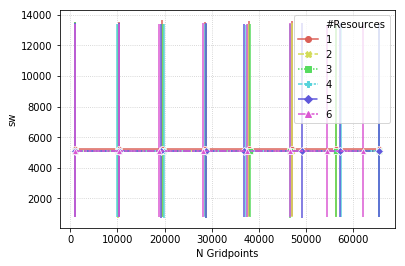

In [68]:
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name,
                                       val=('sw'))
plt.show()

In [50]:
r = results.read_unified_results(ds_obj, 'gridpoints', exp_name)
r['input', 'ndim'].shape

gridpoints/filter-buildtime-8-(.+) - matching: 48 - valid: 48 - total: 480


(48, 10)

gridpoints/filter-buildtime-6-(.+) - matching: 48 - valid: 48 - total: 480
Methods: {'K-D Tree'}


/home/fonaro/workspace/wRaaS/cloud-simulations/optimization/results/analyze.py:25: RuntimeWarning: invalid value encountered in power
  return a * (x**b) * (np.log2(x)**c)


Resource 1 fit: 0.488732 * log^(3.98)(n)
Resource 2 fit: 0.34569 * log^(4.11)(n)
Resource 3 fit: 0.134079 * log^(4.47)(n)
Resource 4 fit: 0.0283789 * log^(5.74)(n)
Resource 5 fit: 0.360299 * n^(1.95)
Resource 6 fit: 0.0138919 * log^(6.34)(n)


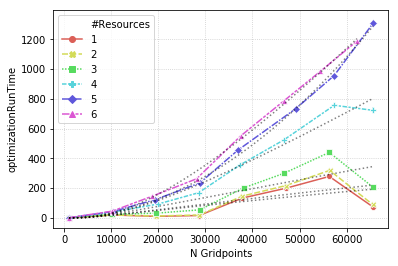

gridpoints/filter-buildtime-6-(.+) - matching: 48 - valid: 48 - total: 480
Methods: {'K-D Tree'}


/home/fonaro/workspace/wRaaS/cloud-simulations/optimization/results/analyze.py:77: RuntimeWarning: invalid value encountered in power
  return a * x * (np.log2(x)**b)


Resource 1 fit: 0.770608 * n * log^(0.41)(n)
Resource 2 fit: 0.66225 * n * log^(0.53)(n)
Resource 3 fit: 0.596474 * n * log^(0.78)(n)
Resource 4 fit: 0.408722 * n * log^(1.14)(n)
Resource 5 fit: 0.148999 * n * log^(1.73)(n)
Resource 6 fit: 0.406019 * n * log^(1.15)(n)


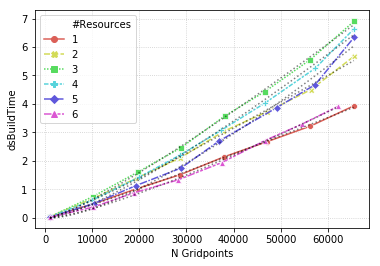

gridpoints/filter-buildtime-6-(.+) - matching: 48 - valid: 48 - total: 480
Methods: {'K-D Tree'}


/home/fonaro/workspace/wRaaS/cloud-simulations/optimization/results/analyze.py:42: RuntimeWarning: invalid value encountered in power
  return (a * (x**2)) + (b * x * (np.log2(x)**c))


Resource 1 fit: (0.00304473 * n^2) + (1.10538 * n * log^(0.10)(n))
Resource 2 fit: (0.00562572 * n^2) + (1.29484 * n * log^(0.00)(n))
Resource 3 fit: (0.00826054 * n^2) + (1.23151 * n * log^(0.16)(n))
Resource 4 fit: (0.0142308 * n^2) + (1.48854 * n)
Resource 5 fit: (0.0133911 * n^2) + (1.12012 * n)
Resource 6 fit: (0.0054202 * n^2) + (0.954086 * n * log^(0.09)(n))


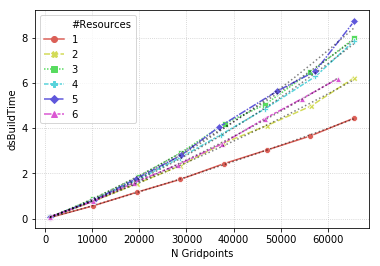

gridpoints/filter-buildtime-6-(.+) - matching: 48 - valid: 48 - total: 480
Methods: {'K-D Tree'}
Resource 1 fit: 8.80617 * log^(2.09)(n)
Resource 2 fit: 1.61572 * log^(2.06)(n)
Resource 3 fit: 0.188754 * log^(1.84)(n)
Resource 4 fit: 0.298526 * n^(0.16) * log^(1.31)(n)
Resource 5 fit: 0.862832 * log^(1.48)(n)
Resource 6 fit: 1.20344 * n^(0.64) * log^(0.24)(n)


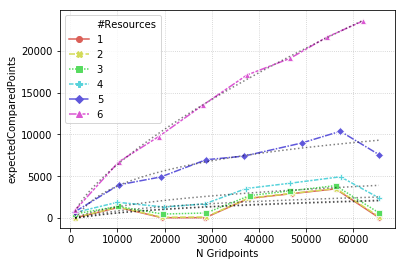

gridpoints/filter-buildtime-6-(.+) - matching: 48 - valid: 48 - total: 480
Methods: {'K-D Tree'}
Resource 1 fit: 23.5842 * n^(0.14)
Resource 2 fit: 9.48534 * n^(0.32)
Resource 3 fit: 0.603378 * n^(0.42)
Resource 4 fit: 0.522684 * n^(0.04) * log^(1.37)(n)
Resource 5 fit: 0.471321 * log^(2.12)(n)
Resource 6 fit: 0.896855 * n^(0.83)


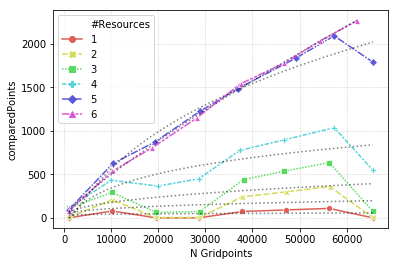

In [16]:
exp_name = 'filter-buildtime-6'
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, sub_val='dsBuildTime')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, val='dsBuildTime', sub_val='dsCreatePointsTime',
                                       fit_method='complexity_func_nlogn')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, val='dsBuildTime',
                                      fit_method='complexity_func_2')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, val='expectedComparedPoints',
                                      div_val='joinedFuncCount')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, val='comparedPoints',
                                       div_val='joinedFuncCount')
plt.show()

gridpoints/buildtime-6m-(.+) - matching: 5 - valid: 5 - total: 50
Methods: {'K-D Tree'}


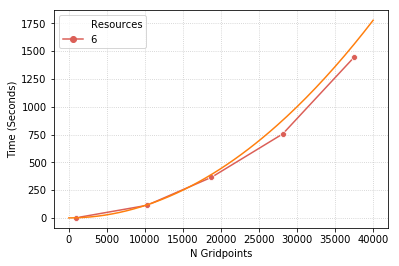

gridpoints/buildtime-6m-(.+) - matching: 5 - valid: 5 - total: 50
Methods: {'K-D Tree'}


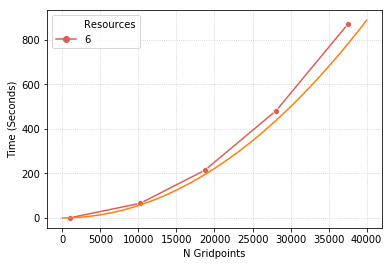

gridpoints/buildtime-6m-(.+) - matching: 5 - valid: 5 - total: 50
Methods: {'K-D Tree'}


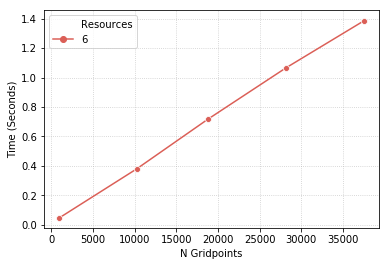

In [251]:
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-6m', timing_val='optimizationRunTime')
x = np.linspace(0, 40000, 128)
p = 2
y = (x**p) * 40 / 6000**p
plt.plot(x, y)
# plt.ylim(0,2)
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-6m', timing_val='dsBuildTime')
x = np.linspace(0, 40000, 128)
p = 2
y = (x**p) * 20 / 6000**p
plt.plot(x, y)
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-6m', timing_val='dsCreatePointsTime')

gridpoints/buildtime-stdnth-6m-(.+) - matching: 5 - valid: 5 - total: 50
Methods: {'K-D Tree'}


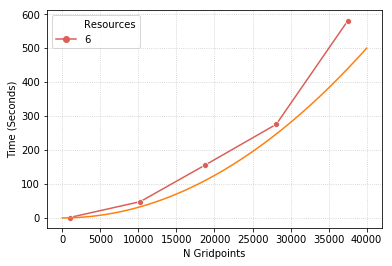

gridpoints/buildtime-stdnth-6m-(.+) - matching: 5 - valid: 5 - total: 50
Methods: {'K-D Tree'}


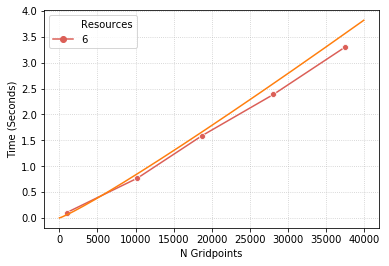

gridpoints/buildtime-stdnth-6m-(.+) - matching: 5 - valid: 5 - total: 50
Methods: {'K-D Tree'}


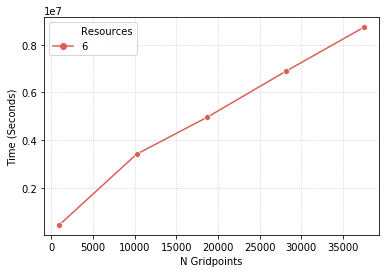

gridpoints/buildtime-stdnth-6m-(.+) - matching: 5 - valid: 5 - total: 50
Methods: {'K-D Tree'}


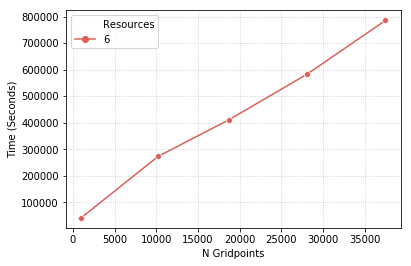

In [252]:
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-stdnth-6m', timing_val='optimizationRunTime')
x = np.linspace(1, 40000, 128)
y = x**2 * 500/ (x[-1]**2)
plt.plot(x, y)
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-stdnth-6m', timing_val='dsBuildTime')
x = np.linspace(1, 40000, 128)
y = (x*np.log2(x)) / (x[-1]*4)
plt.plot(x, y)
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-stdnth-6m', timing_val='expectedComparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-stdnth-6m', timing_val='comparedPoints')
plt.show()

gridpoints/buildtime-3m-(.+) - matching: 15 - valid: 15 - total: 150
Methods: {'2D Range Tree'}


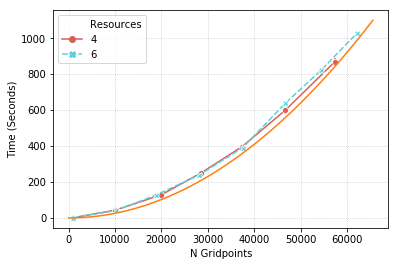

gridpoints/buildtime-3m-(.+) - matching: 15 - valid: 15 - total: 150
Methods: {'2D Range Tree'}


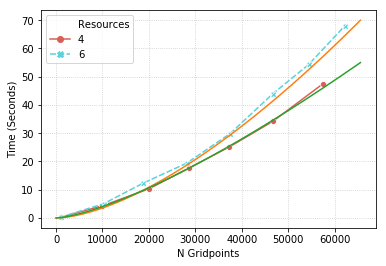

gridpoints/buildtime-3m-(.+) - matching: 15 - valid: 15 - total: 150
Methods: {'2D Range Tree'}


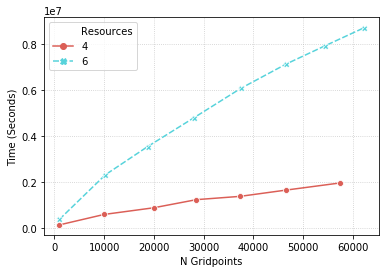

gridpoints/buildtime-3m-(.+) - matching: 15 - valid: 15 - total: 150
Methods: {'2D Range Tree'}


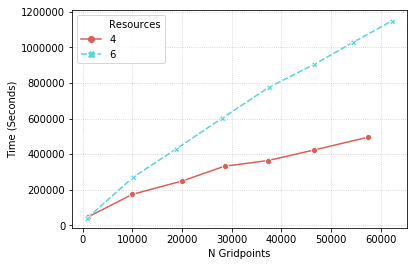

gridpoints/buildtime-3m-(.+) - matching: 15 - valid: 15 - total: 150
Methods: {'2D Range Tree'}


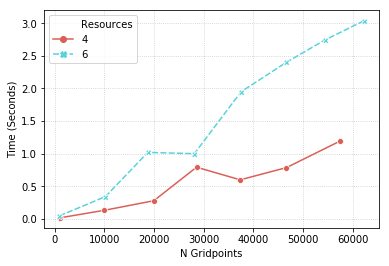

In [168]:
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-3m', timing_val='optimizationRunTime')
x = np.linspace(1, 65536, 128)
y = (x**2) * 1100/ (x[-1]**2)
plt.plot(x, y)
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-3m', timing_val='dsBuildTime')
x = np.linspace(1, 65536, 128)
y = (x*(np.log2(x)**6)) * 70 / (x[-1]*(np.log2(x[-1])**6))
plt.plot(x, y)

y = (x*(np.log2(x)**4)) * 55 / (x[-1]*(np.log2(x[-1])**4))
plt.plot(x, y)

plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-3m', timing_val='expectedComparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-3m', timing_val='comparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', 'buildtime-3m', timing_val='dsCreatePointsTime')

gridpoints/buildtime-stdup-3m-(.+) - matching: 6 - valid: 6 - total: 60
Methods: {'2D Range Tree'}


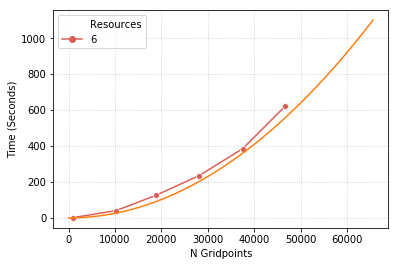

gridpoints/buildtime-stdup-3m-(.+) - matching: 6 - valid: 6 - total: 60
Methods: {'2D Range Tree'}


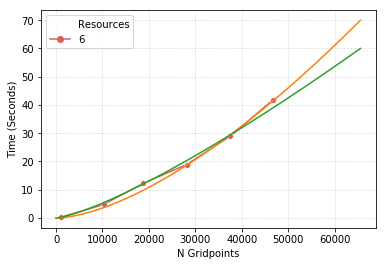

gridpoints/buildtime-stdup-3m-(.+) - matching: 6 - valid: 6 - total: 60
Methods: {'2D Range Tree'}


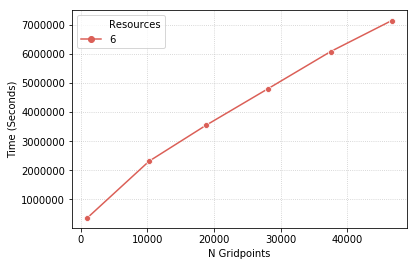

gridpoints/buildtime-stdup-3m-(.+) - matching: 6 - valid: 6 - total: 60
Methods: {'2D Range Tree'}


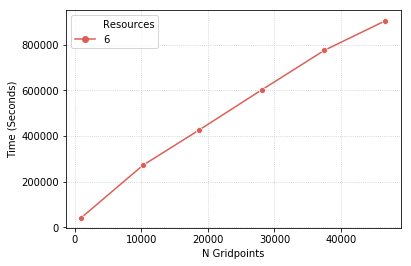

gridpoints/buildtime-stdup-3m-(.+) - matching: 6 - valid: 6 - total: 60
Methods: {'2D Range Tree'}


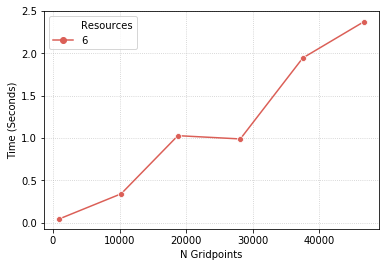

In [203]:
exp_name = 'buildtime-stdup-3m'
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='optimizationRunTime')
x = np.linspace(1, 65536, 128)
y = (x**2) * 1100/ (x[-1]**2)
plt.plot(x, y)
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='dsBuildTime')
x = np.linspace(1, 65536, 128)
y = (x*(np.log2(x)**6)) * 70 / (x[-1]*(np.log2(x[-1])**6))
plt.plot(x, y)

y = (x*(np.log2(x)**3)) * 6 * 10 / (x[-1]*(np.log2(x[-1])**3))
plt.plot(x, y)

plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='expectedComparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='comparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='dsCreatePointsTime')

gridpoints/buildtime-13m-(.+) - matching: 7 - valid: 7 - total: 70
Methods: {'2D Range Tree (C1)'}


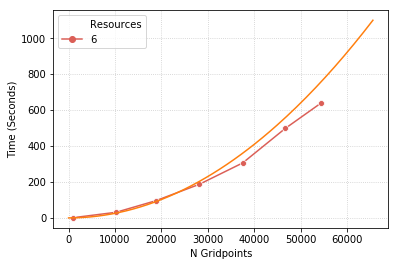

gridpoints/buildtime-13m-(.+) - matching: 7 - valid: 7 - total: 70
Methods: {'2D Range Tree (C1)'}


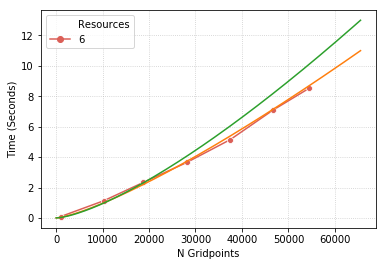

gridpoints/buildtime-13m-(.+) - matching: 7 - valid: 7 - total: 70
Methods: {'2D Range Tree (C1)'}


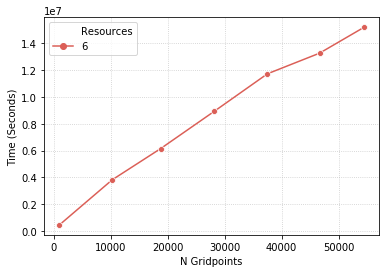

gridpoints/buildtime-13m-(.+) - matching: 7 - valid: 7 - total: 70
Methods: {'2D Range Tree (C1)'}


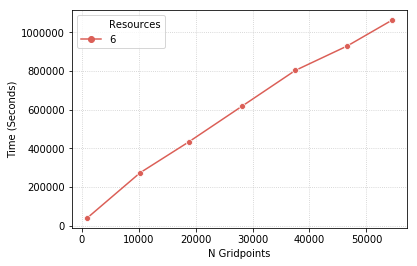

gridpoints/buildtime-13m-(.+) - matching: 7 - valid: 7 - total: 70
Methods: {'2D Range Tree (C1)'}


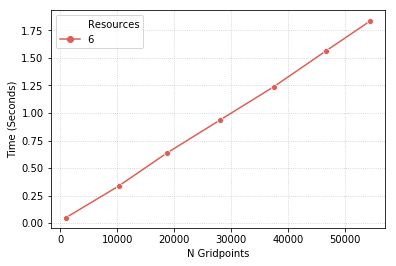

In [230]:
exp_name = 'buildtime-13m'
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='optimizationRunTime')
x = np.linspace(1, 65536, 128)
y = (x**2) * 1100/ (x[-1]**2)
plt.plot(x, y)
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='dsBuildTime')
x = np.linspace(1, 65536, 128)
y = (x*(np.log2(x)**3)) * (11) / (x[-1]*(np.log2(x[-1])**3))
plt.plot(x, y)

y = (x*(np.log2(x)**4)) * (13) / (x[-1]*(np.log2(x[-1])**4))
plt.plot(x, y)

plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='expectedComparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='comparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='dsCreatePointsTime')

gridpoints/buildtime-16m-(.+) - matching: 11 - valid: 11 - total: 110
Methods: {'2D FC Range Tree (C1)'}


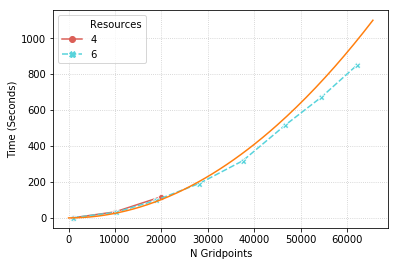

gridpoints/buildtime-16m-(.+) - matching: 11 - valid: 11 - total: 110
Methods: {'2D FC Range Tree (C1)'}


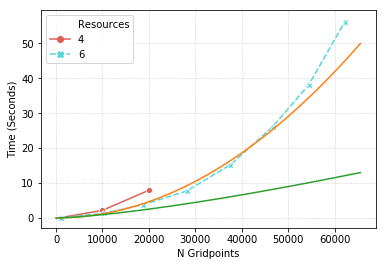

gridpoints/buildtime-16m-(.+) - matching: 11 - valid: 11 - total: 110
Methods: {'2D FC Range Tree (C1)'}


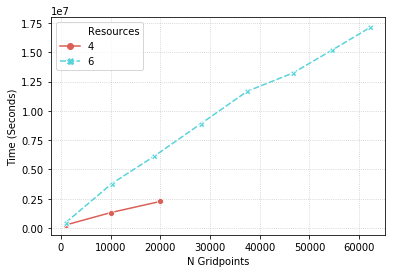

gridpoints/buildtime-16m-(.+) - matching: 11 - valid: 11 - total: 110
Methods: {'2D FC Range Tree (C1)'}


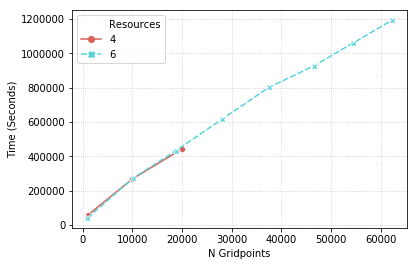

gridpoints/buildtime-16m-(.+) - matching: 11 - valid: 11 - total: 110
Methods: {'2D FC Range Tree (C1)'}


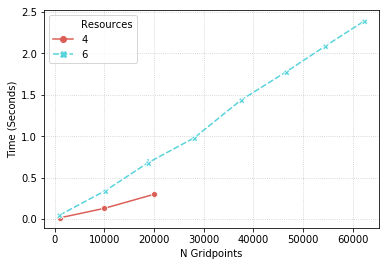

In [250]:
exp_name = 'buildtime-16m'
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='optimizationRunTime')
x = np.linspace(1, 65536, 128)
y = (x**2) * 1100/ (x[-1]**2)
plt.plot(x, y)
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='dsBuildTime')
x = np.linspace(1, 65536, 128)
# y = (x*(np.log2(x)**8)) * (30) / (x[-1]*(np.log2(x[-1])**8))
y = (x**2) * 50/ (x[-1]**2)
plt.plot(x, y)

y = (x*(np.log2(x)**4)) * (13) / (x[-1]*(np.log2(x[-1])**4))
plt.plot(x, y)

plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='expectedComparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='comparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='dsCreatePointsTime')

gridpoints/buildtime-selfmerge-13m-(.+) - matching: 16 - valid: 16 - total: 160
Methods: {'2D Range Tree (C1)'}


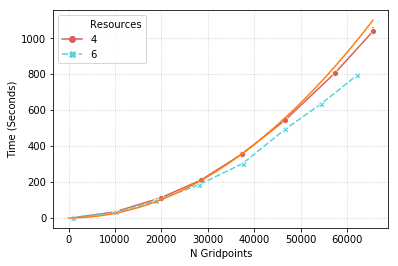

gridpoints/buildtime-selfmerge-13m-(.+) - matching: 16 - valid: 16 - total: 160
Methods: {'2D Range Tree (C1)'}


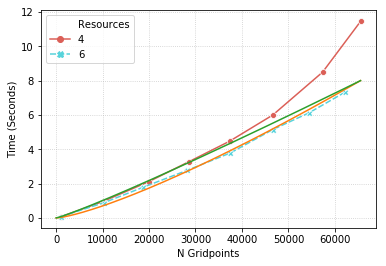

gridpoints/buildtime-selfmerge-13m-(.+) - matching: 16 - valid: 16 - total: 160
Methods: {'2D Range Tree (C1)'}


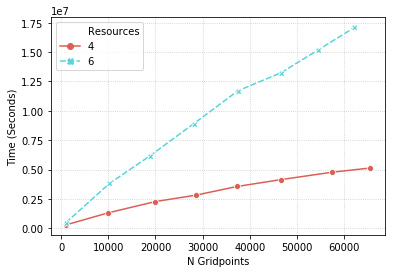

gridpoints/buildtime-selfmerge-13m-(.+) - matching: 16 - valid: 16 - total: 160
Methods: {'2D Range Tree (C1)'}


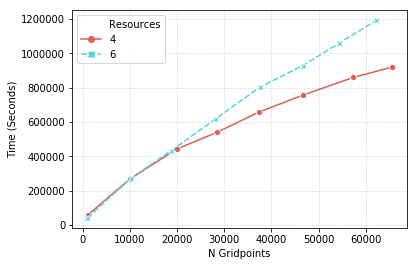

gridpoints/buildtime-selfmerge-13m-(.+) - matching: 16 - valid: 16 - total: 160
Methods: {'2D Range Tree (C1)'}


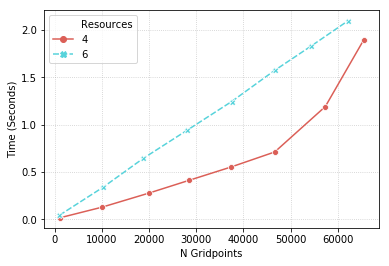

In [277]:
exp_name = 'buildtime-selfmerge-13m'
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='optimizationRunTime')
x = np.linspace(1, 65536, 128)
y = (x**2) * 1100/ (x[-1]**2)
plt.plot(x, y)
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='dsBuildTime')
x = np.linspace(1, 65536, 128)
y = (x*(np.log2(x)**3)) * (8) / (x[-1]*(np.log2(x[-1])**3))
plt.plot(x, y)

y = (x*(np.log2(x))) * (8) / (x[-1]*(np.log2(x[-1])))
plt.plot(x, y)

# y = (x**2) * 50/ (x[-1]**2)
# y = (x*(np.log2(x)**4)) * (13) / (x[-1]*(np.log2(x[-1])**4))
# plt.plot(x, y)

plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='expectedComparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='comparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='dsCreatePointsTime')

gridpoints/buildtime-norec-3m-(.+) - matching: 15 - valid: 15 - total: 150
Methods: {'2D Range Tree'}


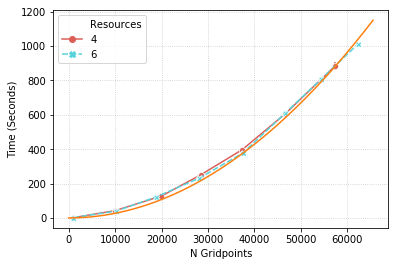

gridpoints/buildtime-norec-3m-(.+) - matching: 15 - valid: 15 - total: 150
Methods: {'2D Range Tree'}


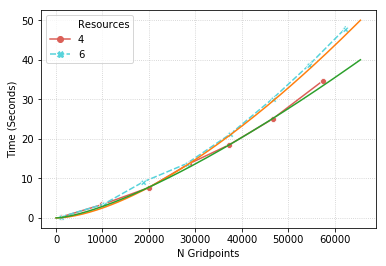

gridpoints/buildtime-norec-3m-(.+) - matching: 15 - valid: 15 - total: 150
Methods: {'2D Range Tree'}


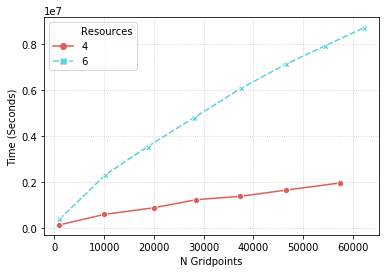

gridpoints/buildtime-norec-3m-(.+) - matching: 15 - valid: 15 - total: 150
Methods: {'2D Range Tree'}


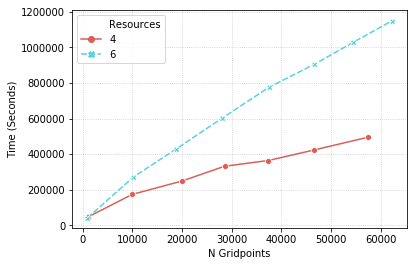

gridpoints/buildtime-norec-3m-(.+) - matching: 15 - valid: 15 - total: 150
Methods: {'2D Range Tree'}


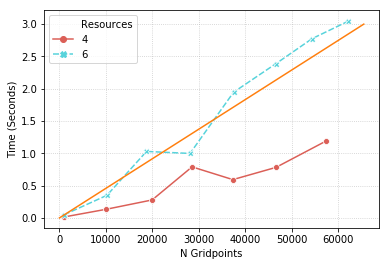

In [315]:
exp_name = 'buildtime-norec-3m'
df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='optimizationRunTime')
x = np.linspace(1, 65536, 128)
y = (x**2) * 1150/ (x[-1]**2)
plt.plot(x, y)
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='dsBuildTime')
x = np.linspace(1, 65536, 128)
y = (x*(np.log2(x)**6)) * (50) / (x[-1]*(np.log2(x[-1])**6))
plt.plot(x, y)

y = (x*(np.log2(x)**4)) * (40) / (x[-1]*(np.log2(x[-1])**4))
plt.plot(x, y)

# y = (x*(np.log2(x))) * (8) / (x[-1]*(np.log2(x[-1])))
# plt.plot(x, y)

# y = (x**2) * 50/ (x[-1]**2)
# y = (x*(np.log2(x)**4)) * (13) / (x[-1]*(np.log2(x[-1])**4))
# plt.plot(x, y)

plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='expectedComparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='comparedPoints')
plt.show()

df = results.plot.joint_val_gridpoints(ds_obj, 'gridpoints', exp_name, timing_val='dsCreatePointsTime')
x = np.linspace(1, 65536, 128)
y = x * 3 / x[-1]
plt.plot(x, y)

In [85]:
r = results.read_unified_results(ds_obj, 'gridpoints-3')
r['stats', 'optimizationRunTime'] - r['stats', 'totalRuntime']

gridpoints-3/(.+) - matching: 26 - valid: 26 - total: 258


array([array([0.0538684 , 0.05429594, 0.05513026, 0.05356186, 0.05360485,
       0.05382631, 0.05408421, 0.0531041 , 0.05278795, 0.11283954]),
       array([4.59064532, 0.06073622, 0.0612844 , 0.05967702, 0.06071968,
       0.06193071, 0.06020418, 0.06084304, 0.06091882, 0.06004216]),
       array([4.92766969, 0.06593712, 0.06766429, 0.06601562, 0.06841597,
       0.0669143 , 0.06696939, 0.06514165, 0.06632508, 0.06669891]),
       array([0.0903247 , 0.09115731, 0.09224509, 0.09441579, 0.10717121,
       0.09408746, 0.08901475, 0.08716339, 0.09080036, 0.15205825]),
       array([0.15290796, 0.13242134, 0.12594261, 0.12856758, 0.13529475,
       0.13042486, 0.12975205, 0.12089372, 0.12078171, 0.12450366]),
       array([0.17004854, 0.13371153, 0.13859809, 0.13371193, 0.1334259 ,
       0.13637981, 0.13164574, 0.13301647, 0.13227634, 0.13157853]),
       array([0.14064149, 0.1406484 , 0.14344763, 0.13838124, 0.14283253,
       0.13800171, 0.13741717, 0.13554302, 0.14284871, 0.20357112]),

In [66]:
for d, ddf in df.groupby(by='ndim'):
    print(d)
    groupped = ddf.groupby('sz')
    t = groupped.mean()
    display(groupped.groups.keys())
    display(np.array(t['perf']))

1


dict_keys([1024, 30037, 59050, 88064, 117077, 146090, 175104, 204117, 233130, 262144])

array([ 0.10453367,  1.99545107,  4.16057112,  6.66034417,  9.06810286,
       11.85372288, 14.48497994, 17.07747073, 19.89826217, 24.00444663])

2


dict_keys([1024, 30102, 59049, 88208, 116964, 145924, 175142])

array([  0.21338413,   9.50891094,  23.77832601,  38.91266384,
        60.64133463,  84.0149498 , 103.49803599])

gridpoints-6/(.+) - matching: 26 - valid: 26 - total: 259


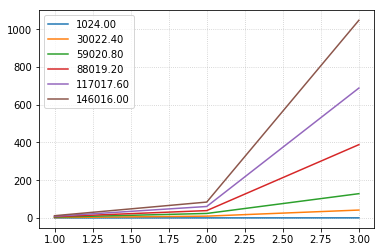

In [79]:
df = results.plot.joint_val_gridpoints_inverse(ds_obj, 'gridpoints-6')

# Test Build Time

test-buildtime/3-(.+) - matching: 48 - valid: 48 - total: 480
Methods: {'2D Binary Search Tree'}
Could not fit resource 1 - Optimal parameters not found: The maximum number of function evaluations is exceeded.
Resource 2 fit: 4.38696e-09 * n^(1.98)
Resource 3 fit: 1.33942e-09 * n^(2.16)
Resource 4 fit: 2.45388e-09 * n^(2.13)
Resource 5 fit: 1.66555e-09 * n^(2.20)
Could not fit resource 6 - Optimal parameters not found: The maximum number of function evaluations is exceeded.


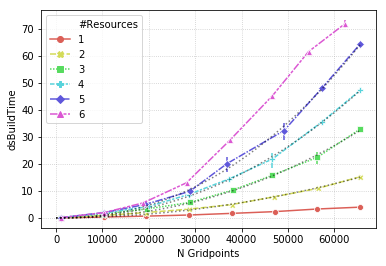

In [144]:
exp_name = 'test-buildtime'
exp_prefix = "3"
df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'dsBuildTime'),
                                       fit_method='complexity_func_pow_logn')
plt.show()

test-buildtime/8-(.+) - matching: 48 - valid: 48 - total: 264
Methods: {'Multi 2D Binary Search Tree (Single)'}
Resource 1 fit: 1.43117e-06 * n * log^(1.43)(n)
Resource 2 fit: 3.2856e-06 * n * log^(1.66)(n)
Resource 3 fit: 2.44223e-06 * n * log^(1.99)(n)
Resource 4 fit: 8.79428e-07 * n * log^(2.46)(n)
Resource 5 fit: 1.55497e-08 * n * log^(3.96)(n)
Resource 6 fit: 1.34479e-06 * n * log^(2.37)(n)


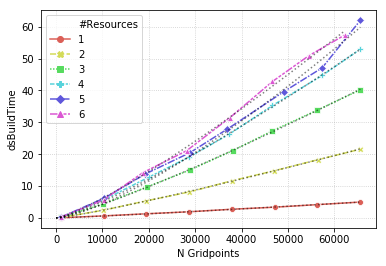

In [217]:
exp_name = 'test-buildtime'
exp_prefix = "8"
df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'dsBuildTime'),
                                      fit_method='complexity_func_nlogn')
plt.show()

test-buildtime/20-(.+) - matching: 24 - valid: 24 - total: 240
Methods: {'Multi 2D Binary Search Tree (Fake)'}


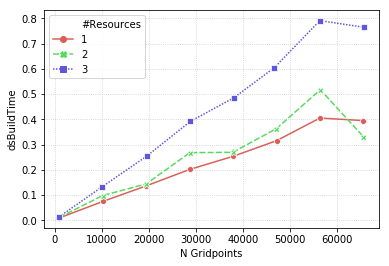

In [171]:
exp_name = 'test-buildtime'
exp_prefix = "20"
df = results.plot.joint_val_gridpoints(ds_obj, exp_name, exp_prefix,
                                       val=('stats', 'dsBuildTime'))
plt.show()

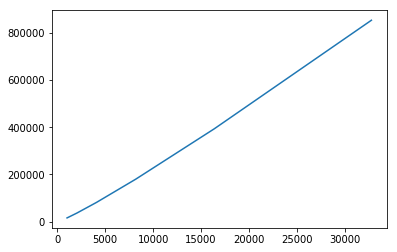

In [143]:
xy = [(1024,16405),(2048,36888),(4096,81947),(8192,180254),(16384,393249),(32768,852004),]
xy = np.array(xy, dtype=float)
x = xy[:,0]
y = xy[:,1]
plt.plot(x,y)

# Matching Points

In [24]:
fields = 'comparedPoints', 'expectedComparedPoints', 'comparedEdgePoints'
fields_tuples = [('stats', f) for f in fields]
exp_name = 'ds-count-filter-grad'
exp_suffix = 'substitute'

comp_df_concave = results.analyze.joint_val_data_frame(data.concave, exp_name, exp_suffix=exp_suffix,
                                                       fields=fields_tuples)
comp_df_concave['comparedNonEdgePoints'] = comp_df_concave.apply(lambda row: (row['comparedPoints']-row['comparedEdgePoints']),axis=1)

comp_df_nonconcave = results.analyze.joint_val_data_frame(data.increasing, exp_name, exp_suffix=exp_suffix,
                                                          fields=fields_tuples)
comp_df_nonconcave['comparedNonEdgePoints'] = comp_df_nonconcave.apply(lambda row: (row['comparedPoints']-row['comparedEdgePoints']),axis=1)

comp_df_nonrising = results.analyze.joint_val_data_frame(data.non_increasing, exp_name, exp_suffix=exp_suffix,
                                                         fields=fields_tuples)
comp_df_nonrising['comparedNonEdgePoints'] = comp_df_nonrising.apply(lambda row: (row['comparedPoints']-row['comparedEdgePoints']),axis=1)

vcg-concave-6d-256p : ('ds-count-filter-grad', slice(None, None, None), 'substitute') - matching: 60 - valid: 60 - total: 600
Methods: {'Category Tree'}
vcg-increasing-6d-256p : ('ds-count-filter-grad', slice(None, None, None), 'substitute') - matching: 60 - valid: 60 - total: 600
Methods: {'Category Tree'}
vcg-non-increasing-6d-256p : ('ds-count-filter-grad', slice(None, None, None), 'substitute') - matching: 60 - valid: 60 - total: 600
Methods: {'Category Tree'}


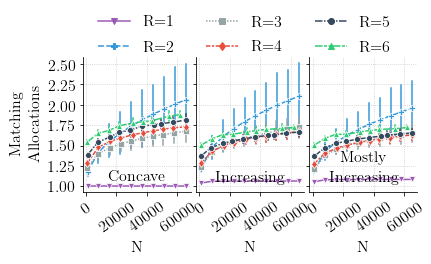

In [25]:
fig, axes = plt.subplots(1,3,sharex=True, sharey=True, figsize=(6,2.5))
plt.subplots_adjust(wspace=0.05)
arts = []

t_datasets_names = "Concave", "Increasing", "Mostly\nIncreasing"

all_ds_df = comp_df_concave, comp_df_nonconcave, comp_df_nonrising
for ds_ind, (ax, comp_df) in enumerate(zip(axes, all_ds_df)):
    sns.lineplot(x='N Gridpoints', y="comparedPoints", hue='Resources', style='Resources', data=comp_df,
                     err_style='bars',legend='full', markers=resources_markers,
                     palette=resources_color_palette, ax=ax)

    ax.grid(True, linestyle=':', alpha=0.7)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("N")
    
    ax.locator_params(axis='y', nbins=7)
    ax.locator_params(axis='x', nbins=7)
    for tick in ax.get_xticklabels():
        tick.set_rotation(35)
        
    label = t_datasets_names[ds_ind]
    arts.append(ax.text(0.5, 0.05, label, va='bottom', ha='center', transform=ax.transAxes))

    if ds_ind == 0:
        ax.set_ylabel("Matching\nAllocations")
        handles, labels = ax.get_legend_handles_labels()
        arts.append(ax.legend(handles=handles[1:], labels=convert_resources_labels(labels[1:]),
                              loc='upper center', bbox_transform=fig.transFigure,
                              bbox_to_anchor=(0.5, 1.2), ncol=3, frameon=False))#,
#                               handletextpad=0.2, columnspacing=0.5))
    else:
        ax.legend_.remove()
        ax.set_ylabel("")

# axes[0].set_ylim(0, 3)

# Analyze Valuations

In [26]:
sd = data.non_increasing.load_data(0)

/home/fonaro/workspace/wRaaS/vecfunc/vecfunc/visualize.py:132: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Z = vec[sample_mesh]


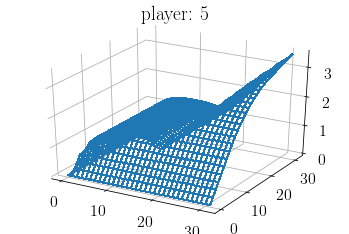

In [33]:
# plt.figure(figsize=(14,8))
data.plot.plot_val(sd, 5, resource_dependency='csm')
plt.show()

<IPython.core.display.Javascript object>


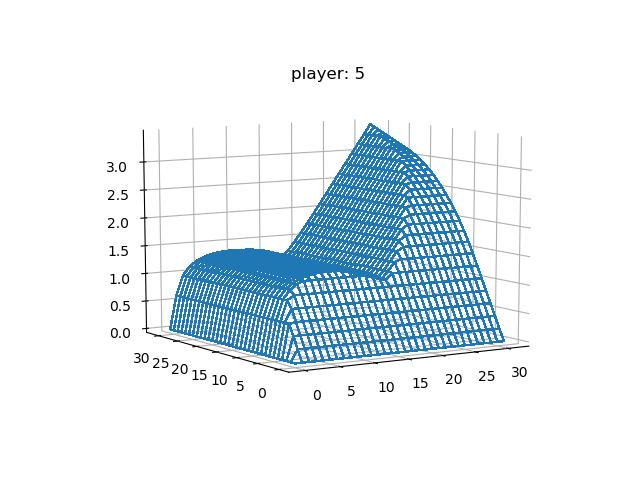

In [14]:
# plt.figure(figsize=(14,8))
data.plot.plot_val(sd, 5, resource_dependency='complementary')
plt.show()

<IPython.core.display.Javascript object>


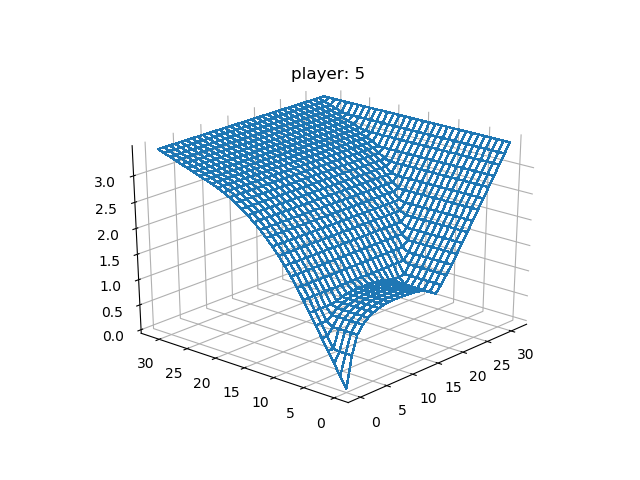

In [15]:
# plt.figure(figsize=(14,8))
data.plot.plot_val(sd, 5, resource_dependency='substitute')
plt.show()